In [1]:
! pip install segmentation_models
! pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 28.6 MB/s eta 0:00:0000:0100:01


In [2]:
# Model stuff
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import model_utility
import os

#path sorting
import glob
import cv2
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Segmentation Models: using `keras` framework.


# What are we doing today?

In [9]:
model_path = "models/"
type = "both2Aug"
training_size = "1200"
epoch_num = "1400"
backbone = "resnet34"

# Create training data

In [5]:
# X, Y = [], []

X, Y = model_utility.data_gather(X, Y, "dark_spokes_training_images", "dark_spokes_training_masks", aug_flag = 1, aug_num = 5)

Compose([
  ShiftScaleRotate(always_apply=False, p=1, shift_limit_x=(-0.0625, 0.0625), shift_limit_y=(0, 0), scale_limit=(0.0, 0.0), rotate_limit=(0, 0), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box'),
  RandomBrightnessContrast(always_apply=True, p=1, brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), brightness_by_max=True),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={'image': 'mask'}, is_check_shapes=True)
1200 1200


In [6]:
X = normalize(np.array(X), axis=1)
Y = (np.array(Y))/255.

# train/test split test_size = .15 for light, .25 for dark(no agu)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)

SIZE_Y, SIZE_X = X.shape[1], X.shape[2]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1020, 160, 736)
(180, 160, 736)
(1020, 160, 736)
(180, 160, 736)


In [11]:
model = model_utility.define_model(SIZE_Y, SIZE_X, backbone)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 160, 736, 1  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 160, 736, 1)  3           ['data[0][0]']                   
                                                                                                  
 zero_padding2d_34 (ZeroPadding  (None, 166, 742, 1)  0          ['bn_data[0][0]']                
 2D)                                                                                              
                                                                                            

In [12]:
history = model_utility.fit_model(x_train, y_train, model, batch_size = 10, epochs = int(epoch_num), validation_split = .13)

Epoch 1/1400
89/89 [==============================] - 29s 260ms/step - loss: 0.2359 - iou_score: 0.0563 - val_loss: 0.1693 - val_iou_score: 0.0092
Epoch 2/1400
89/89 [==============================] - 22s 247ms/step - loss: 0.0719 - iou_score: 0.1397 - val_loss: 0.1582 - val_iou_score: 0.0306
Epoch 3/1400
89/89 [==============================] - 22s 247ms/step - loss: 0.0524 - iou_score: 0.2366 - val_loss: 0.1128 - val_iou_score: 0.0021
Epoch 4/1400
89/89 [==============================] - 22s 248ms/step - loss: 0.0418 - iou_score: 0.3235 - val_loss: 0.0840 - val_iou_score: 0.0182
Epoch 5/1400
89/89 [==============================] - 22s 247ms/step - loss: 0.0358 - iou_score: 0.3774 - val_loss: 0.0843 - val_iou_score: 0.0213
Epoch 6/1400
89/89 [==============================] - 22s 247ms/step - loss: 0.0316 - iou_score: 0.4226 - val_loss: 0.0998 - val_iou_score: 0.0062
Epoch 7/1400
89/89 [==============================] - 22s 247ms/step - loss: 0.0302 - iou_score: 0.4316 - val_loss: 0.

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



89/89 [==============================] - 22s 246ms/step - loss: 5.1353e-05 - iou_score: 0.9987 - val_loss: 0.0013 - val_iou_score: 0.9240
Epoch 826/1400
89/89 [==============================] - 22s 247ms/step - loss: 7.9584e-05 - iou_score: 0.9983 - val_loss: 0.0014 - val_iou_score: 0.9177
Epoch 827/1400
89/89 [==============================] - 22s 247ms/step - loss: 1.0637e-04 - iou_score: 0.9977 - val_loss: 0.0014 - val_iou_score: 0.9204
Epoch 828/1400
89/89 [==============================] - 22s 247ms/step - loss: 7.7566e-05 - iou_score: 0.9983 - val_loss: 0.0013 - val_iou_score: 0.9302
Epoch 829/1400
89/89 [==============================] - 22s 246ms/step - loss: 9.9139e-05 - iou_score: 0.9978 - val_loss: 0.0015 - val_iou_score: 0.9455
Epoch 830/1400
89/89 [==============================] - 22s 246ms/step - loss: 2.4254e-04 - iou_score: 0.9943 - val_loss: 0.0014 - val_iou_score: 0.9382
Epoch 831/1400
89/89 [==============================] - 22s 247ms/step - loss: 1.0631e-04 - iou_s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



89/89 [==============================] - 22s 249ms/step - loss: 2.5219e-05 - iou_score: 0.9769 - val_loss: 0.0014 - val_iou_score: 0.9214
Epoch 895/1400
89/89 [==============================] - 22s 248ms/step - loss: 6.8144e-05 - iou_score: 0.9986 - val_loss: 0.0015 - val_iou_score: 0.9149
Epoch 896/1400
89/89 [==============================] - 22s 248ms/step - loss: 2.6119e-04 - iou_score: 0.9952 - val_loss: 0.0025 - val_iou_score: 0.9014
Epoch 897/1400
89/89 [==============================] - 22s 250ms/step - loss: 2.6167e-04 - iou_score: 0.9930 - val_loss: 0.0012 - val_iou_score: 0.9158
Epoch 898/1400
89/89 [==============================] - 22s 248ms/step - loss: 5.0133e-05 - iou_score: 0.9982 - val_loss: 0.0012 - val_iou_score: 0.9290
Epoch 899/1400
89/89 [==============================] - 22s 249ms/step - loss: 2.3300e-05 - iou_score: 0.9992 - val_loss: 0.0012 - val_iou_score: 0.9254
Epoch 900/1400
89/89 [==============================] - 22s 249ms/step - loss: 1.3416e-05 - iou_s

# Plots

In [17]:
results = model.evaluate(x_test, y_test)

6/6 [==============================] - 3s 341ms/step - loss: 6.1736e-04 - iou_score: 0.0019


In [18]:
model_utility.save_model(f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5", model, history, results)

models/both2Aug_spoke_1200im_1400e_resnet34.h5


Which model is this? - dark2Aug_spoke_360im_1400e_resnet34.json


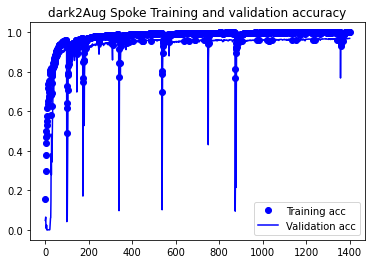

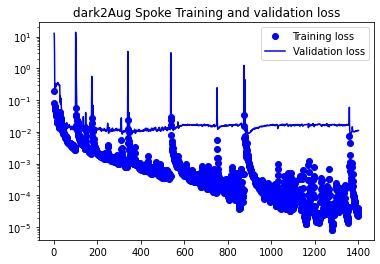

Last Train IOU Score:  0.9993763566017151
Last Train Loss Score:  3.6315297620603815e-05
Last Validation IOU Score:  0.968753457069397
Last Validation Loss Score:  0.011049313470721245
dark2Aug
360
1400


In [5]:
model_utility.display_results(f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.json")
print(type)
print(training_size)
print(epoch_num)

In [26]:
model_path = "models/"
type = "dark2Aug"
training_size = "360"
epoch_num = "300"
backbone = "resnet34"

In [4]:
from tensorflow import keras

model = keras.models.load_model(f"models/{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5", compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

print(type)
print(training_size)
print(epoch_num)

dark2Aug
360
1400


# testing with images outside of train/test(light)

In [ ]:
model_utility.model_testing(model, "dark", 10)